Epoch 1/5
750/750 [==============================] - 8s 10ms/step - loss: 0.3514 - accuracy: 0.8914 - val_loss: 0.0695 - val_accuracy: 0.9802
Epoch 2/5
750/750 [==============================] - 8s 10ms/step - loss: 0.1115 - accuracy: 0.9688 - val_loss: 0.0543 - val_accuracy: 0.9834
Epoch 3/5
750/750 [==============================] - 7s 10ms/step - loss: 0.0769 - accuracy: 0.9793 - val_loss: 0.0480 - val_accuracy: 0.9873
Epoch 4/5
750/750 [==============================] - 8s 10ms/step - loss: 0.0631 - accuracy: 0.9824 - val_loss: 0.0460 - val_accuracy: 0.9873
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0305 - accuracy: 0.9904

Test accuracy: 0.9904


/Users/roopaldixit/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


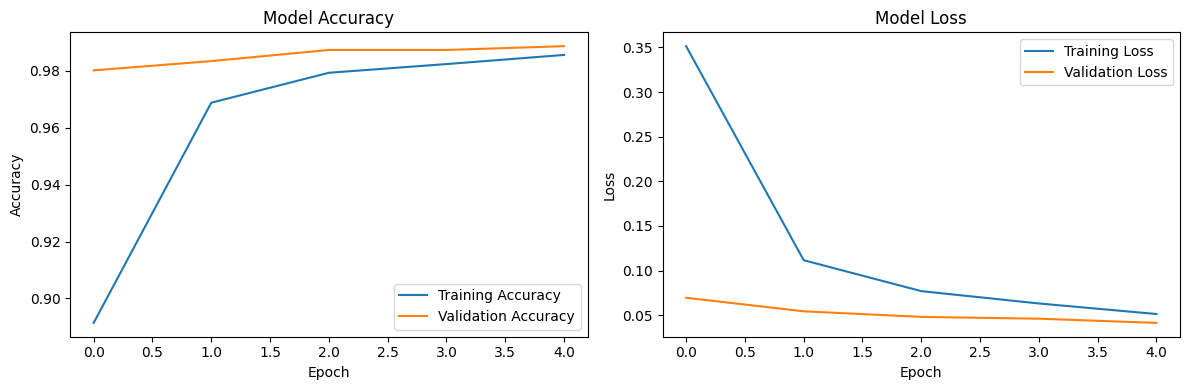

1/1 [==============================] - 0s 71ms/step
Predicted digit: 7, Actual digit: 7


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images to include channel dimension (28x28x1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, 
                   epochs=5, 
                   batch_size=64, 
                   validation_split=0.2)

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

# Save model
model.save('mnist_cnn_model.h5')

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Function to predict single image
def predict_digit(image):
    image = image.reshape(1, 28, 28, 1)
    prediction = model.predict(image)
    return np.argmax(prediction[0])

# Example: Predict first test image
sample_image = x_test[0]
predicted_digit = predict_digit(sample_image)
print(f'Predicted digit: {predicted_digit}, Actual digit: {np.argmax(y_test[0])}')